

```

```

Pregunta numero 1
https://drive.google.com/drive/folders/1KK8qqaQnQKd1LNnPqH18QSdkAe4EjHCS?usp=sharing



In [1]:
import random
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image, ImageOps
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
from sklearn.datasets import fetch_openml
from torch.utils.data import DataLoader
%matplotlib inline
from pycocotools.coco import COCO
import pylab

pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!cp -av "/content/drive/MyDrive/dataP" "/content/data"

'/content/drive/MyDrive/dataP' -> '/content/data'
'/content/drive/MyDrive/dataP/labels_my-project-name_2022-08-05-01-43-15.json' -> '/content/data/labels_my-project-name_2022-08-05-01-43-15.json'
'/content/drive/MyDrive/dataP/patos' -> '/content/data/patos'
'/content/drive/MyDrive/dataP/patos/pato (27).jpg' -> '/content/data/patos/pato (27).jpg'
'/content/drive/MyDrive/dataP/patos/pato (9).jpg' -> '/content/data/patos/pato (9).jpg'
'/content/drive/MyDrive/dataP/patos/pato (22).jpg' -> '/content/data/patos/pato (22).jpg'
'/content/drive/MyDrive/dataP/patos/pato (13).jpg' -> '/content/data/patos/pato (13).jpg'
'/content/drive/MyDrive/dataP/patos/pato (47).jpg' -> '/content/data/patos/pato (47).jpg'
'/content/drive/MyDrive/dataP/patos/pato (32).jpg' -> '/content/data/patos/pato (32).jpg'
'/content/drive/MyDrive/dataP/patos/pato (30).jpg' -> '/content/data/patos/pato (30).jpg'
'/content/drive/MyDrive/dataP/patos/pato (5).jpg' -> '/content/data/patos/pato (5).jpg'
'/content/drive/MyDrive/da

In [4]:
import json
cocofile= open("/content/data/labels_my-project-name_2022-08-05-01-40-21.json")
pato_coco = json.load(cocofile)

In [5]:
pato_coco['categories'][0],pato_coco['images'][0], pato_coco['annotations'][0]

({'id': 1, 'name': 'pato'},
 {'file_name': 'pato (1).jpg', 'height': 500, 'id': 1, 'width': 500},
 {'area': 7050.365294303249,
  'bbox': [30.42491355744918,
   285.6848263504481,
   160.89108910891085,
   91.27475247524751],
  'category_id': 1,
  'id': 0,
  'image_id': 1,
  'iscrowd': 0,
  'segmentation': [[30.42491355744918,
    342.92492536034905,
    50.53629969606304,
    340.6043808058936,
    62.91253731982541,
    336.7368065484679,
    53.63035910200363,
    332.095717439557,
    61.36550761685511,
    321.2665095187649,
    77.60931949804323,
    327.4546283306461,
    95.40016108220163,
    325.13408377619066,
    97.72070563665709,
    325.9075986276758,
    116.28506207230065,
    329.00165803361637,
    130.20832939903332,
    333.6427471425273,
    134.07590365645905,
    342.15141050886393,
    146.45214128022144,
    333.6427471425273,
    147.99917098319173,
    322.8135392217352,
    141.81105217131054,
    316.62542040985403,
    145.6786264287363,
    296.5140342712

In [6]:
import json
vggfile= open("/content/data/labels_my-project-name_2022-08-05-01-43-15.json")
pato_vgg = json.load(vggfile)

In [7]:
pato_vgg['Qué Pasa con los Patos_012.jpg']

{'base64_img_data': '',
 'file_attributes': {},
 'filename': 'Qué Pasa con los Patos_012.jpg',
 'fileref': '',
 'regions': {'0': {'region_attributes': {'label': 'pato'},
   'shape_attributes': {'all_points_x': [250.38080731150023,
     248.47677075399832,
     244.98603706524483,
     239.90860624523975,
     236.7352119827366,
     231.6577811627315,
     224.0416349327239,
     221.50291952272136,
     216.7428281289666,
     217.69484640771756,
     223.72429550647357,
     229.4364051789793,
     239.27392739273913,
     243.71667936024357,
     251.01548616400086,
     247.8420919014977,
     238.32190911398817,
     238.6392485402385,
     248.159431327748,
     244.03401878649387,
     250.38080731150023,
     258.31429296775815,
     267.83447575526765,
     277.6719979690275,
     291.3175932977911,
     302.42447321655226,
     313.214013709063,
     321.7821782178216,
     321.46483879157125,
     321.46483879157125,
     322.41685707032224,
     324.6382330540744,
     327.

In [8]:
image_id=1
pato_data=COCO("/content/data/labels_my-project-name_2022-08-05-01-40-21.json")

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [9]:
img = pato_data.imgs[image_id]
img

{'file_name': 'pato (1).jpg', 'height': 500, 'id': 1, 'width': 500}

In [10]:
a=img['file_name']
#a=f"/content/data/patos/{a}"
c = "/content/data/patos/"+img['file_name']
b="/content/data/patos/pato (1).jpg"
c == b
c,b

('/content/data/patos/pato (1).jpg', '/content/data/patos/pato (1).jpg')

In [11]:
for c1,b2 in zip(c,b):
  if c1 !=b2:
    print(c1,b2)

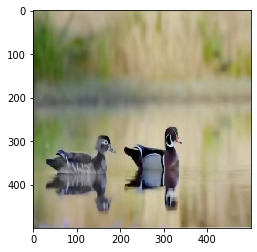

In [13]:
image = np.real(Image.open("/content/data/patos/"+img['file_name']))
plt.imshow(image, interpolation='nearest')
plt.show()


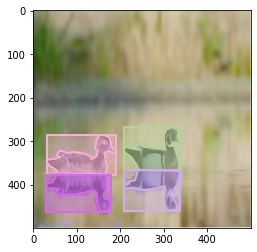

In [14]:
plt.imshow(image)
cat_ids = pato_data.getCatIds()
anns_ids = pato_data.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = pato_data.loadAnns(anns_ids)
pato_data.showAnns(anns,draw_bbox=True)

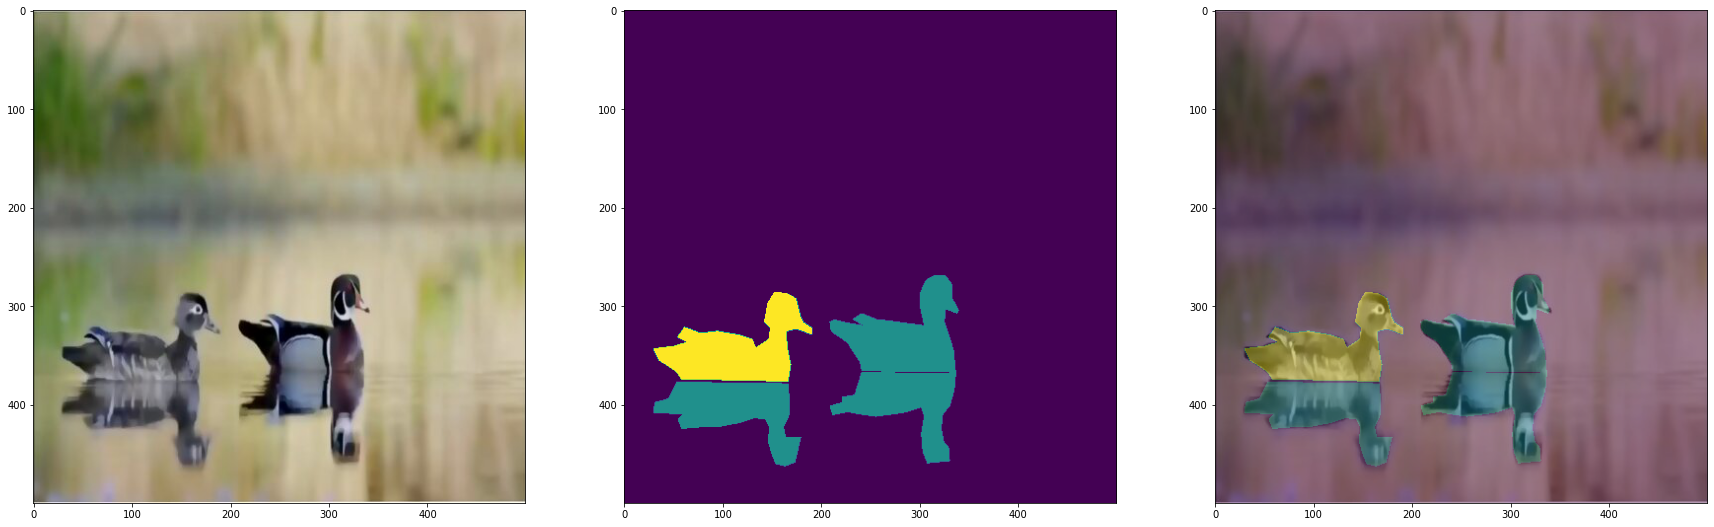

In [15]:
mask = pato_data.annToMask(anns[0])
for i in range(len(anns)):
    mask += pato_data.annToMask(anns[i])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))

ax1.imshow(image)
ax2.imshow(mask)
ax3.imshow(image)
ax3.imshow(mask, alpha=0.4)
plt.show()
#plt.imshow(mask)

In [16]:
image.shape

(500, 500, 3)

In [17]:
mask = pato_data.annToMask(anns[0])
mask.shape, image.max()

((500, 500), 255)

In [20]:
from random import sample
def loadImages(dataset_pato, split=0.1):
    img_test_ = []
    img_train_ = []
    labels_test_ = []
    labels_train_ = []
    data_ = dataset_pato.anns
    test_ids = sample([x for x in range(0,len(pato_data.anns))],int(len(pato_data.anns)*split))
    for i in data_:
        image_id_ = data_[i]['image_id']
        img_ = pato_data.imgs[image_id_]
        image_path="/content/data/patos/"+img_['file_name']
        image_load_ = Image.open(image_path).convert('RGB')
        image_ = np.array(image_load_)/255
        anns_=dataset_pato.loadAnns(data_[i]['id'])
        mask_ = dataset_pato.annToMask(anns_[0])
        for ian in range(len(anns_)):
            mask_ += dataset_pato.annToMask(anns_[ian])
        if(i not in test_ids):
            img_train_.append(image_path)
            labels_train_.append(mask_)
        else:
            img_test_.append(image_path)
            labels_test_.append(mask_)
    return np.array(img_train_), np.array(img_test_), np.array(labels_train_), np.array(labels_test_)

In [21]:
img_train, img_test, labels_train, labels_test = loadImages(pato_data, split=0.1)

In [ ]:
labels_train.shape, labels_test.shape, labels_test.min(), labels_test.max()

((941, 600, 800), (104, 600, 800), 0, 2)

In [23]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, n_classes=3):
    self.X = X
    self.y = y
    self.n_classes = n_classes

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
      image_load = Image.open(self.X[ix]).convert('RGB')
      image = np.array(image_load)/255
      img = image.astype(np.float32)

      mask = self.y[ix]    
      img = torch.from_numpy(img).permute(2,0,1)
      mask = (np.arange(self.n_classes) == mask[...,None]).astype(np.float32)
      return img, torch.from_numpy(mask).permute(2,0,1)

In [24]:
dataset = {
    'train': Dataset(img_train, labels_train),
    'test': Dataset(img_test, labels_test)
}

len(dataset['train']), len(dataset['test'])

(107, 11)

In [25]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=5, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=10, pin_memory=True)
}

imgs, masks = next(iter(dataloader['train']))
imgs.shape, masks.shape

(torch.Size([5, 3, 500, 500]), torch.Size([5, 3, 500, 500]))

In [26]:
import torch.nn.functional as F

def conv3x3_bn(ci, co):
    return torch.nn.Sequential(
        torch.nn.Conv2d(ci, co, 3, padding=1),
        torch.nn.BatchNorm2d(co),
        torch.nn.ReLU(inplace=True)
    )

def encoder_conv(ci, co):
  return torch.nn.Sequential(
        torch.nn.MaxPool2d(2),
        conv3x3_bn(ci, co),
        conv3x3_bn(co, co),
    )

class deconv(torch.nn.Module):
    def __init__(self, ci, co):
        super(deconv, self).__init__()
        self.upsample = torch.nn.ConvTranspose2d(ci, co, 2, stride=2)
        self.conv1 = conv3x3_bn(ci, co)
        self.conv2 = conv3x3_bn(co, co)
    
    # recibe la salida de la capa anetrior y la salida de la etapa
    # correspondiente del encoder
    def forward(self, x1, x2):
        x1 = self.upsample(x1)
        diffX = x2.size()[2] - x1.size()[2]
        diffY = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, (diffX, 0, diffY, 0))
        # concatenamos los tensores
        x = torch.cat([x2, x1], dim=1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x

class UNet(torch.nn.Module):
    def __init__(self, n_classes=3, in_ch=3):
        super().__init__()

        # lista de capas en encoder-decoder con número de filtros
        c = [16, 32, 64, 128]

        # primera capa conv que recibe la imagen
        self.conv1 = torch.nn.Sequential(
          conv3x3_bn(in_ch, c[0]),
          conv3x3_bn(c[0], c[0]),
        )
        # capas del encoder
        self.conv2 = encoder_conv(c[0], c[1])
        self.conv3 = encoder_conv(c[1], c[2])
        self.conv4 = encoder_conv(c[2], c[3])

        # capas del decoder
        self.deconv1 = deconv(c[3],c[2])
        self.deconv2 = deconv(c[2],c[1])
        self.deconv3 = deconv(c[1],c[0])

        # útlima capa conv que nos da la máscara
        self.out = torch.nn.Conv2d(c[0], n_classes, 3, padding=1)

    def forward(self, x):
        # encoder
        x1 = self.conv1(x)
        x2 = self.conv2(x1)
        x3 = self.conv3(x2)
        x = self.conv4(x3)
        # decoder
        x = self.deconv1(x, x3)
        x = self.deconv2(x, x2)
        x = self.deconv3(x, x1)
        x = self.out(x)
        return x

In [27]:
model = UNet()
output = model(torch.randn((5,3,600,800)))
output.shape

torch.Size([5, 3, 600, 800])

In [28]:
def iou(outputs, labels):
    # aplicar sigmoid y convertir a binario
    outputs, labels = torch.sigmoid(outputs) > 0.5, labels > 0.5
    SMOOTH = 1e-6
    # BATCH x num_classes x H x W
    B, N, H, W = outputs.shape
    ious = []
    for i in range(N-1): # saltamos el background
        _out, _labs = outputs[:,i,:,:], labels[:,i,:,:]
        intersection = (_out & _labs).float().sum((1, 2))  
        union = (_out | _labs).float().sum((1, 2))         
        iou = (intersection + SMOOTH) / (union + SMOOTH)  
        ious.append(iou.mean().item())
    return np.mean(ious)

In [29]:
from tqdm import tqdm

def fit(model, dataloader, epochs=100, lr=3e-4):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.BCEWithLogitsLoss()
    model.to(device)
    hist = {'loss': [], 'iou': [], 'test_loss': [], 'test_iou': []}
    for epoch in range(1, epochs+1):
      bar = tqdm(dataloader['train'])
      train_loss, train_iou = [], []
      model.train()
      for imgs, masks in bar:
        imgs, masks = imgs.to(device), masks.to(device)
        optimizer.zero_grad()
        y_hat = model(imgs)
        loss = criterion(y_hat, masks)
        loss.backward()
        optimizer.step()
        ious = iou(y_hat, masks)
        train_loss.append(loss.item())
        train_iou.append(ious)
        bar.set_description(f"loss {np.mean(train_loss):.5f} iou {np.mean(train_iou):.5f}")
      hist['loss'].append(np.mean(train_loss))
      hist['iou'].append(np.mean(train_iou))
      bar = tqdm(dataloader['test'])
      test_loss, test_iou = [], []
      model.eval()
      with torch.no_grad():
        for imgs, masks in bar:
          imgs, masks = imgs.to(device), masks.to(device)
          y_hat = model(imgs)
          loss = criterion(y_hat, masks)
          ious = iou(y_hat, masks)
          test_loss.append(loss.item())
          test_iou.append(ious)
          bar.set_description(f"test_loss {np.mean(test_loss):.5f} test_iou {np.mean(test_iou):.5f}")
      hist['test_loss'].append(np.mean(test_loss))
      hist['test_iou'].append(np.mean(test_iou))
      print(f"\nEpoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} iou {np.mean(train_iou):.5f} test_loss {np.mean(test_loss):.5f} test_iou {np.mean(test_iou):.5f}")
    return hist

In [30]:
model = UNet()
hist = fit(model, dataloader, epochs=30)

test_loss 0.53926 test_iou 0.89661: 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]



Epoch 1/30 loss 0.50480 iou 0.43758 test_loss 0.53926 test_iou 0.89661


test_loss 0.41584 test_iou 0.59717: 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]



Epoch 2/30 loss 0.35477 iou 0.45246 test_loss 0.41584 test_iou 0.59717


test_loss 0.26529 test_iou 0.94925: 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]



Epoch 3/30 loss 0.26245 iou 0.81488 test_loss 0.26529 test_iou 0.94925


test_loss 0.19134 test_iou 0.98229: 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]



Epoch 4/30 loss 0.20436 iou 0.97148 test_loss 0.19134 test_iou 0.98229


test_loss 0.17355 test_iou 0.97942: 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]



Epoch 5/30 loss 0.17871 iou 0.97087 test_loss 0.17355 test_iou 0.97942


test_loss 0.14476 test_iou 0.97806: 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]



Epoch 6/30 loss 0.14460 iou 0.97860 test_loss 0.14476 test_iou 0.97806


test_loss 0.11478 test_iou 0.98731: 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]



Epoch 7/30 loss 0.12372 iou 0.98224 test_loss 0.11478 test_iou 0.98731


test_loss 0.09816 test_iou 0.98823: 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]



Epoch 8/30 loss 0.10805 iou 0.98516 test_loss 0.09816 test_iou 0.98823


test_loss 0.08760 test_iou 0.98665: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]



Epoch 9/30 loss 0.09709 iou 0.98569 test_loss 0.08760 test_iou 0.98665


test_loss 0.08043 test_iou 0.98724: 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]



Epoch 10/30 loss 0.08680 iou 0.98553 test_loss 0.08043 test_iou 0.98724


test_loss 0.07266 test_iou 0.98556: 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]



Epoch 11/30 loss 0.08551 iou 0.98390 test_loss 0.07266 test_iou 0.98556


test_loss 0.06422 test_iou 0.98854: 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]



Epoch 12/30 loss 0.07662 iou 0.98608 test_loss 0.06422 test_iou 0.98854


test_loss 0.06619 test_iou 0.98716: 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]



Epoch 13/30 loss 0.07469 iou 0.98528 test_loss 0.06619 test_iou 0.98716


test_loss 0.06489 test_iou 0.98606: 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]



Epoch 14/30 loss 0.07627 iou 0.98276 test_loss 0.06489 test_iou 0.98606


test_loss 0.05581 test_iou 0.98706: 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]



Epoch 15/30 loss 0.06949 iou 0.98536 test_loss 0.05581 test_iou 0.98706


test_loss 0.05144 test_iou 0.98829: 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]



Epoch 16/30 loss 0.06295 iou 0.98625 test_loss 0.05144 test_iou 0.98829


test_loss 0.05159 test_iou 0.98781: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]



Epoch 17/30 loss 0.06466 iou 0.98634 test_loss 0.05159 test_iou 0.98781


test_loss 0.04756 test_iou 0.98821: 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]



Epoch 18/30 loss 0.06090 iou 0.98627 test_loss 0.04756 test_iou 0.98821


test_loss 0.10436 test_iou 0.96782: 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]



Epoch 19/30 loss 0.06535 iou 0.98485 test_loss 0.10436 test_iou 0.96782


test_loss 0.04467 test_iou 0.98879: 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]



Epoch 20/30 loss 0.05839 iou 0.98608 test_loss 0.04467 test_iou 0.98879


test_loss 0.04927 test_iou 0.98731: 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]



Epoch 21/30 loss 0.06013 iou 0.98592 test_loss 0.04927 test_iou 0.98731


test_loss 0.04681 test_iou 0.98765: 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]



Epoch 22/30 loss 0.05740 iou 0.98580 test_loss 0.04681 test_iou 0.98765


test_loss 0.04410 test_iou 0.98836: 100%|██████████| 2/2 [00:00<00:00,  5.68it/s]



Epoch 23/30 loss 0.05508 iou 0.98637 test_loss 0.04410 test_iou 0.98836


test_loss 0.05135 test_iou 0.98330: 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]



Epoch 24/30 loss 0.05738 iou 0.98617 test_loss 0.05135 test_iou 0.98330


test_loss 0.03861 test_iou 0.98888: 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]



Epoch 25/30 loss 0.05431 iou 0.98659 test_loss 0.03861 test_iou 0.98888


test_loss 0.03979 test_iou 0.98901: 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]



Epoch 26/30 loss 0.05489 iou 0.98656 test_loss 0.03979 test_iou 0.98901


test_loss 0.03789 test_iou 0.98892: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]



Epoch 27/30 loss 0.05275 iou 0.98664 test_loss 0.03789 test_iou 0.98892


test_loss 0.03783 test_iou 0.98903: 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]



Epoch 28/30 loss 0.05071 iou 0.98657 test_loss 0.03783 test_iou 0.98903


test_loss 0.03931 test_iou 0.98868: 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]



Epoch 29/30 loss 0.05073 iou 0.98667 test_loss 0.03931 test_iou 0.98868


test_loss 0.03757 test_iou 0.98881: 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]


Epoch 30/30 loss 0.05259 iou 0.98642 test_loss 0.03757 test_iou 0.98881


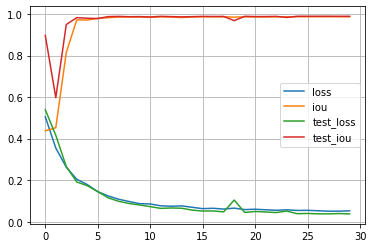

In [31]:
import pandas as pd
df = pd.DataFrame(hist)
df.plot(grid=True)
plt.show()

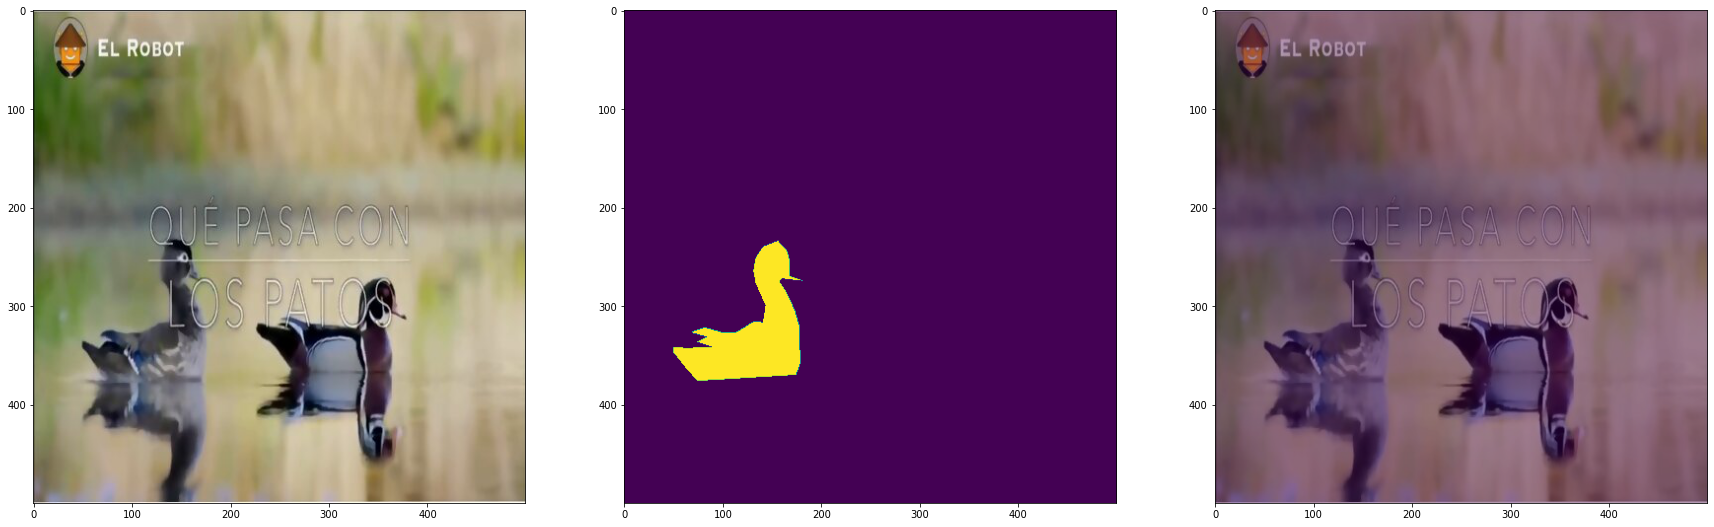

In [34]:
import random

model.eval()
with torch.no_grad():
    ix = random.randint(0, len(dataset['test'])-1)
    img, mask = dataset['test'][ix]
    
    output = model(img.unsqueeze(0).to(device))[0]
    pred_mask = torch.argmax(output, axis=0)
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(img.squeeze(0).permute(1,2,0))
ax2.imshow(torch.argmax(mask, axis=0))

ax3.imshow(img.squeeze(0).permute(1,2,0))
ax3.imshow(pred_mask.squeeze().cpu().numpy(), alpha=0.4)

plt.show()

In [47]:
image_load_1 = Image.open('/content/data/patos/pato (45).jpg')
image_1 = np.array(image_load_1)/255
img_1 = image_1.astype(np.float32)
img_1 = torch.from_numpy(img_1).permute(2,0,1)

image_load_2 = Image.open('/content/data/patos/pato (50).jpg')
image_2 = np.array(image_load_2)/255
img_2 = image_2.astype(np.float32)
img_2 = torch.from_numpy(img_2).permute(2,0,1)


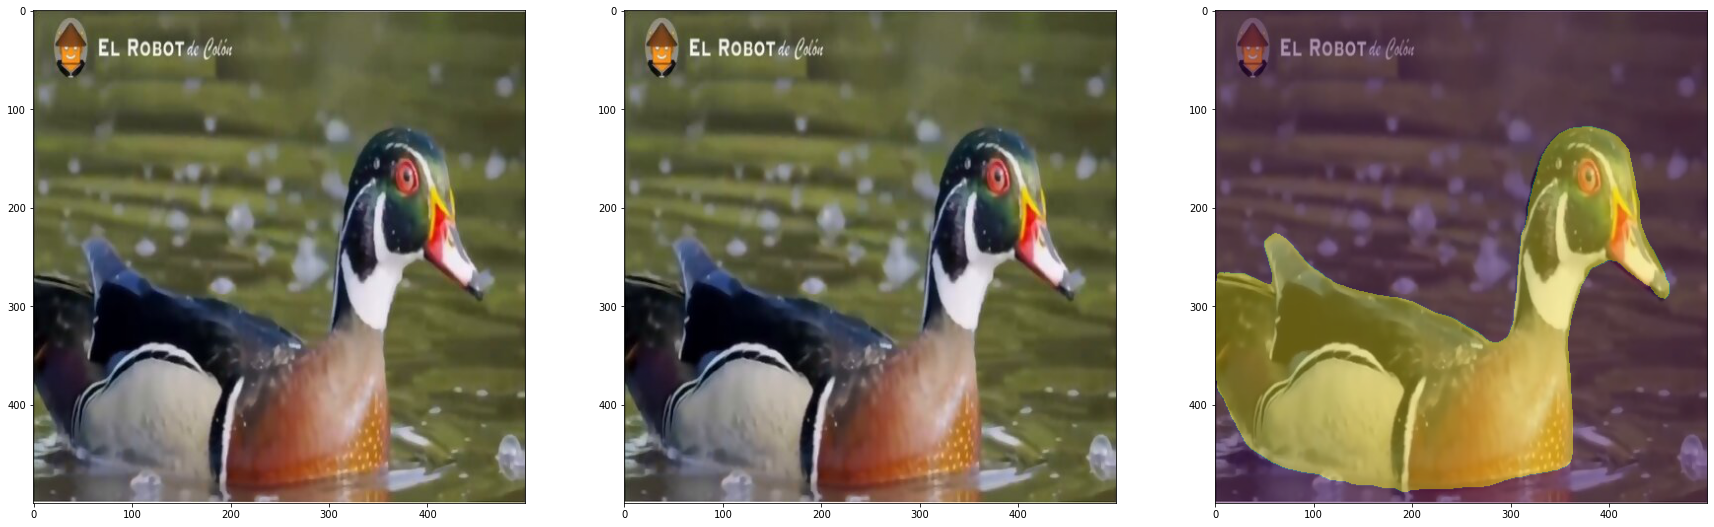

In [48]:
model.eval()
with torch.no_grad():
    output = model(img_2.unsqueeze(0).to(device))[0]
    pred_mask = torch.argmax(output, axis=0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(img_2.squeeze(0).permute(1,2,0))
ax2.imshow(image_2)

ax3.imshow(img_2.squeeze(0).permute(1,2,0))
ax3.imshow(pred_mask.squeeze().cpu().numpy(), alpha=0.4)


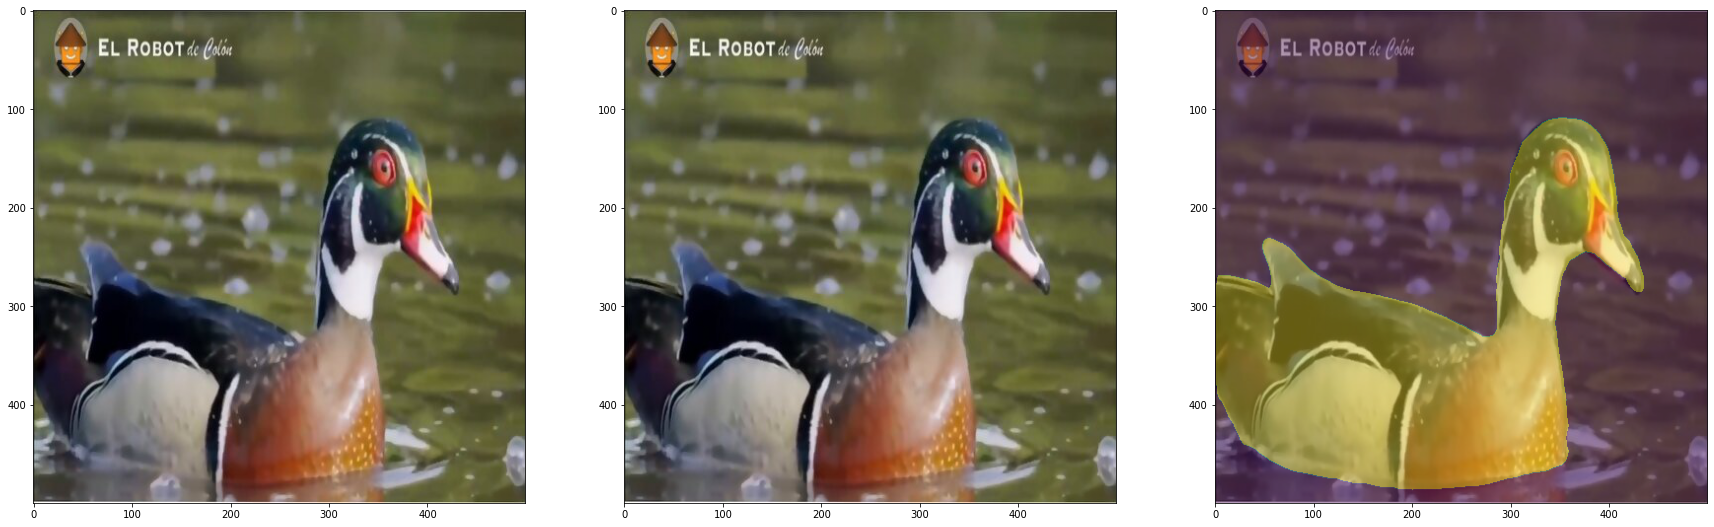

In [49]:
model.eval()
with torch.no_grad():
    output = model(img_1.unsqueeze(0).to(device))[0]
    pred_mask = torch.argmax(output, axis=0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(img_1.squeeze(0).permute(1,2,0))
ax2.imshow(image_1)

ax3.imshow(img_1.squeeze(0).permute(1,2,0))
ax3.imshow(pred_mask.squeeze().cpu().numpy(), alpha=0.4)